# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_coordinates_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_coordinates = requests.get(city_coordinates_url)
        city_coordinates = city_coordinates.json()
        
        city_lat = city_coordinates[0]["lat"]
        city_lng = city_coordinates[0]["lon"]
        city_country = city_coordinates[0]["country"]
        
        city_weather_url = f"{weather_url}lat={city_lat}&lon={city_lng}&units=imperial&appid={weather_api_key}"
        
        city_weather = requests.get(city_weather_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | deputatskiy
Processing Record 6 of Set 1 | raciu
Processing Record 7 of Set 1 | fort-shevchenko
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | kruszwica
Processing Record 15 of Set 1 | comodoro rivadavia
Processing Record 16 of Set 1 | mandalgovi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | fertod
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | menongue
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set

Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | malanje
Processing Record 41 of Set 4 | jizan
Processing Record 42 of Set 4 | jonesboro
Processing Record 43 of Set 4 | mehamn
Processing Record 44 of Set 4 | batie
Processing Record 45 of Set 4 | jaicos
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | juneau
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | gigmoto
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | stephenville
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | jurm
Processing Record 5 of Set 5 | praya
Processing Record 6 of Set 5 | arua
Processing Record 7 of Set 5 | port moresby
Processing Record 8 of Set 5 | landskrona
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | belushya guba
Processing Record 11 of Set 5 | san policarpo
Processing Record 12 of Set 5 | iqaluit
Processing Record 13 of S

Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | tutoia
Processing Record 37 of Set 8 | raudeberg
Processing Record 38 of Set 8 | ciudad bolivar
Processing Record 39 of Set 8 | wilmington
Processing Record 40 of Set 8 | micheweni
Processing Record 41 of Set 8 | dhidhdhoo
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | ariquemes
Processing Record 44 of Set 8 | torbay
Processing Record 45 of Set 8 | hasilpur
Processing Record 46 of Set 8 | dongkan
Processing Record 47 of Set 8 | evensk
Processing Record 48 of Set 8 | port hardy
Processing Record 49 of Set 8 | cabo san lucas
Processing Record 0 of Set 9 | taut
Processing Record 1 of Set 9 | sitka
Processing Record 2 of Set 9 | santiago
Processing Record 3 of Set 9 | powell river
Processing Record 4 of Set 9 | charters towers
Processing Record 5 of Set 9 | gat
Processing Record 6 of Set 9 | bilma
Processing Record 7 of Set 9 | boali
Processing Record 8 of Set 9 | 

Processing Record 28 of Set 12 | pasil
Processing Record 29 of Set 12 | kutum
Processing Record 30 of Set 12 | baihar
Processing Record 31 of Set 12 | uchaly
Processing Record 32 of Set 12 | san-pedro
Processing Record 33 of Set 12 | midyat
Processing Record 34 of Set 12 | aguimes
Processing Record 35 of Set 12 | hovd
Processing Record 36 of Set 12 | touros
Processing Record 37 of Set 12 | dar es salaam
Processing Record 38 of Set 12 | athabasca
Processing Record 39 of Set 12 | kulhudhuffushi
Processing Record 40 of Set 12 | alpena
Processing Record 41 of Set 12 | ola
Processing Record 42 of Set 12 | novikovo
Processing Record 43 of Set 12 | nara
Processing Record 44 of Set 12 | placido de castro
Processing Record 45 of Set 12 | lahaina
Processing Record 46 of Set 12 | astoria
Processing Record 47 of Set 12 | congleton
Processing Record 48 of Set 12 | biak
Processing Record 49 of Set 12 | turukhansk
Processing Record 0 of Set 13 | nyurba
Processing Record 1 of Set 13 | jumla
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          608
Lat           608
Lng           608
Max Temp      608
Humidity      608
Cloudiness    608
Wind Speed    608
Country       608
Date          608
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.347200,57.764748,81.52,78,40,17.27,MU,1675785551
1,naze,5.452000,7.056674,98.91,24,38,3.31,NG,1675785551
2,mar del plata,-37.997723,-57.548270,76.91,80,100,13.00,AR,1675785552
3,mataura,-46.192734,168.864269,51.48,61,74,5.50,NZ,1675785553
4,deputatskiy,54.840848,61.126992,3.51,98,97,4.32,RU,1675785553


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bambous virieux,-20.347199,57.764748,81.52,78,40,17.27,MU,1675785551
1,naze,5.452000,7.056674,98.91,24,38,3.31,NG,1675785551
2,mar del plata,-37.997723,-57.548270,76.91,80,100,13.00,AR,1675785552
3,mataura,-46.192734,168.864269,51.48,61,74,5.50,NZ,1675785553
4,deputatskiy,54.840848,61.126992,3.51,98,97,4.32,RU,1675785553


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

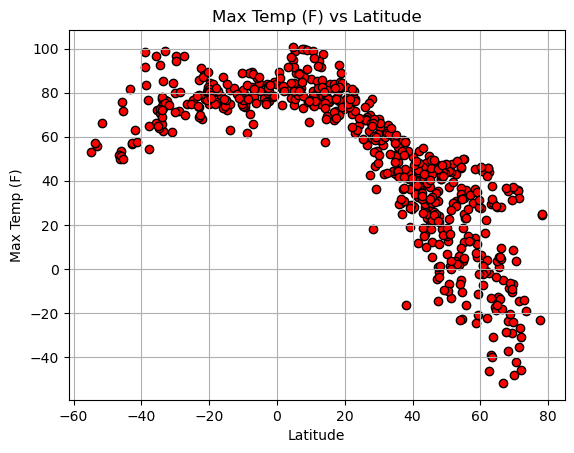

In [8]:
# Build scatter plot for latitude vs. temperature
figure1 = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="red", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Max Temp (F) vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/figure1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

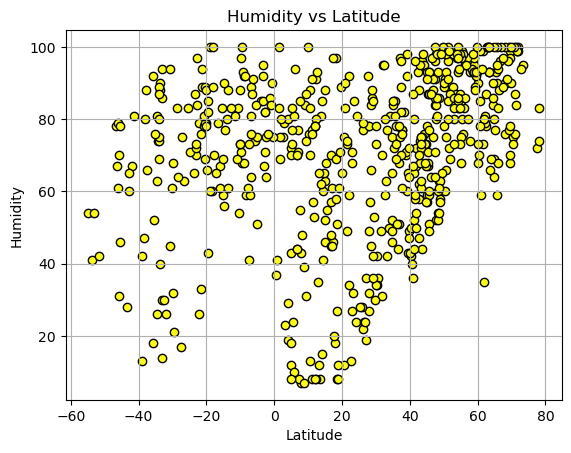

In [9]:
# Build the scatter plots for latitude vs. humidity
figure2 = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="yellow", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/figure2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

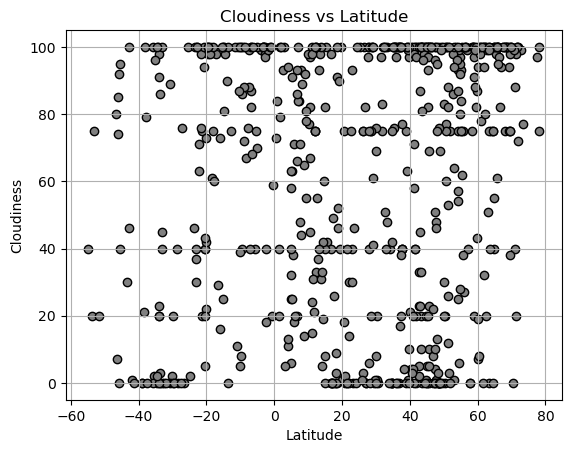

In [10]:
# Build the scatter plots for latitude vs. cloudiness
figure3 = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="gray", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/figure3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

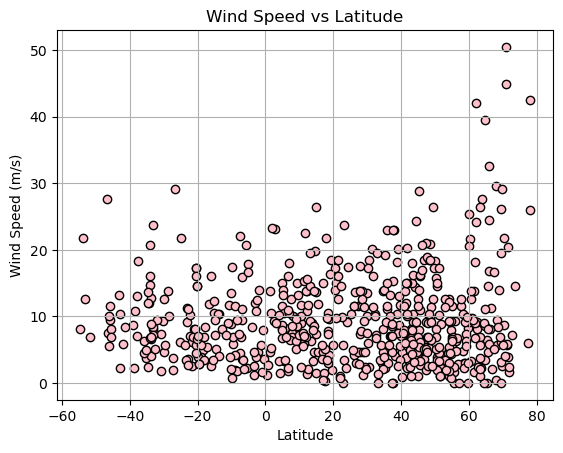

In [11]:
# Build the scatter plots for latitude vs. wind speed
figure4 = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="pink", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/figure4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression_line(x,y,color="red"):
    slope, intercept, r, p, se = linregress(x, y)
    return [plt.scatter(x,y,facecolor="blue", edgecolor="black"), 
            plt.plot(x,(slope*x + intercept), color=color), 
            print("The r-value is:", r), 
            print(f"y = {slope:.2f}x + {intercept:.2f}")]

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,naze,5.452000,7.056674,98.91,24,38,3.31,NG,1675785551
4,deputatskiy,54.840848,61.126992,3.51,98,97,4.32,RU,1675785553
5,raciu,44.817907,25.441065,28.06,73,100,3.36,RO,1675785554
6,fort-shevchenko,44.508556,50.261929,40.30,73,100,24.27,KZ,1675785554
9,qaanaaq,77.468636,-69.222275,-23.26,72,97,5.99,GL,1675785556


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bambous virieux,-20.347199,57.764748,81.52,78,40,17.27,MU,1675785551
2,mar del plata,-37.997723,-57.548270,76.91,80,100,13.00,AR,1675785552
3,mataura,-46.192734,168.864269,51.48,61,74,5.50,NZ,1675785553
7,ushuaia,-54.806116,-68.318497,53.26,54,40,8.05,AR,1675785555
8,constitucion,-35.331831,-72.411900,72.01,52,2,3.78,CL,1675785555


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8628533994616202
y = -1.46x + 98.30


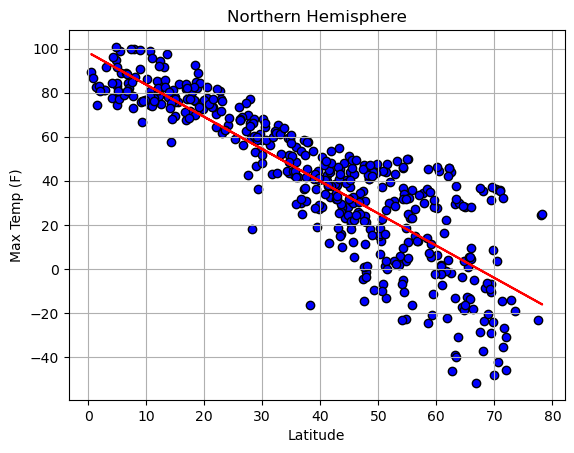

In [15]:
# Linear regression on Northern Hemisphere
regression_line(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere")
plt.grid()
plt.show()

The r-value is: 0.46580677913220475
y = 0.34x + 83.87


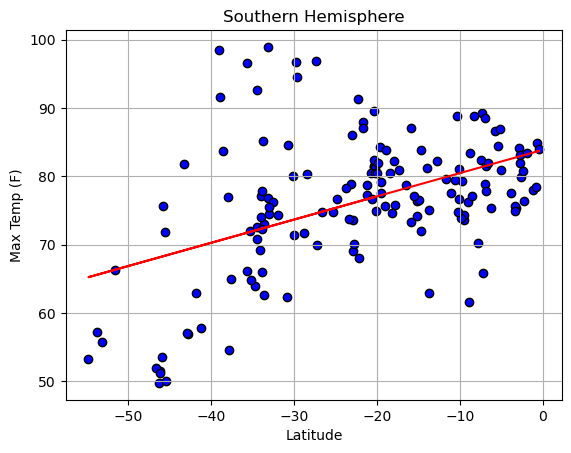

In [16]:
# Linear regression on Southern Hemisphere
regression_line(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere")
plt.grid()
plt.show()

**Discussion about the linear relationship:**
The relationship between latitude and temperature is strongly correlated in the northern hemisphere and moderately correlated in the southern hemisphere. The southern hemisphere contains hot spots from about -25 to -38 latitude that would need some investigating. Latitudes near 0 are more likely to be warmer in temperature than latitudes near +-90.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5191218250382421
y = 0.62x + 46.68


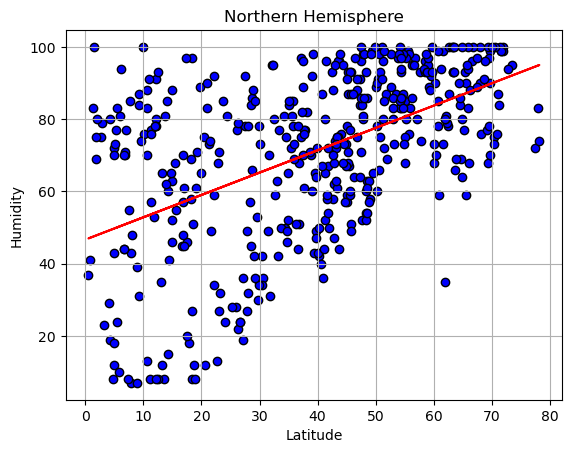

In [17]:
# Northern Hemisphere
regression_line(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere")
plt.grid()
plt.show()

The r-value is: 0.368972722084629
y = 0.53x + 81.72


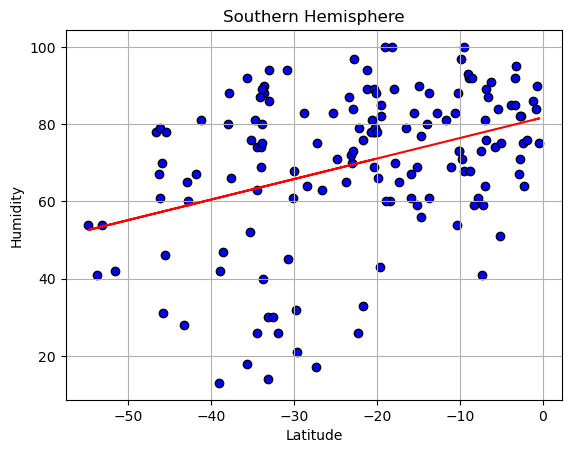

In [18]:
# Southern Hemisphere
regression_line(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere")
plt.grid()
plt.show()

**Discussion about the linear relationship:** 
The relationship between latitude and humidity is weakly correlated in each hemisphere as latitude increases to the North. This may be more of a symptom of the city's proximity to a body of water rather than latitude. The southern hemisphere contains some data points between -25 and -38 that are less humid than other points in the dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21043370579348328
y = 0.41x + 43.10


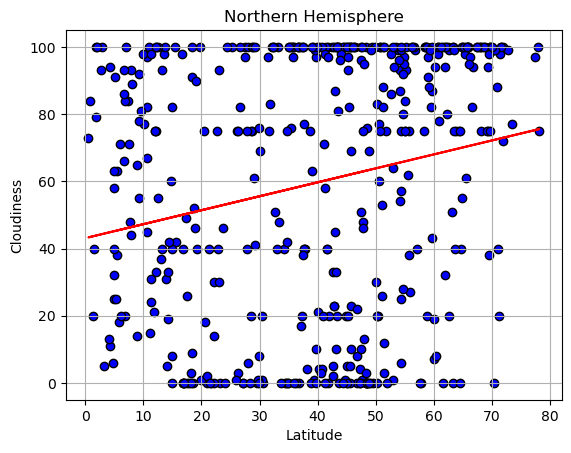

In [19]:
# Northern Hemisphere
regression_line(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere")
plt.grid()
plt.show()

The r-value is: 0.3771254400838703
y = 1.06x + 82.69


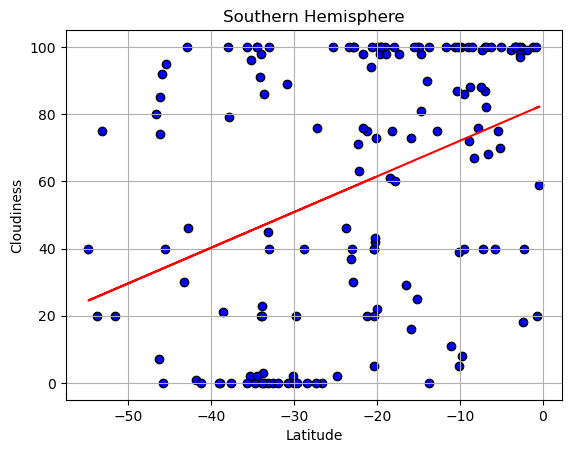

In [20]:
# Southern Hemisphere
regression_line(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere")
plt.grid()
plt.show()

**Discussion about the linear relationship:** Cloudiness does not show a correlation to latitude. Cloudiness most likely is related to factors other than latitude. An interesting observation does show between -25 and -38 latitude there are about 8 data points that are high temp, low humidity, and 0 cloudiness suggesting perhaps a desert climate was sampled in that latitude range.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07108806924685912
y = 0.03x + 8.36


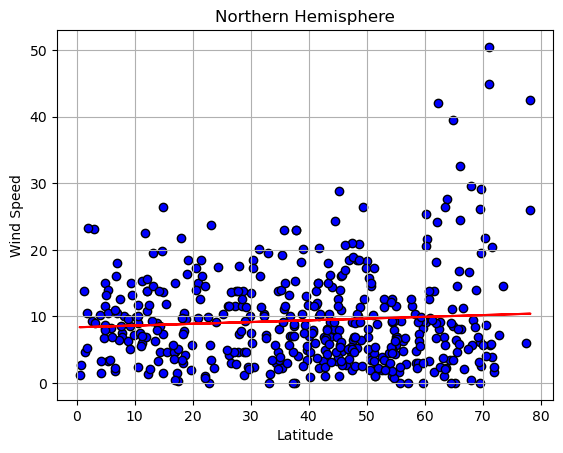

In [21]:
# Northern Hemisphere
regression_line(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere")
plt.grid()
plt.show()

The r-value is: -0.16135428241642
y = -0.06x + 7.24


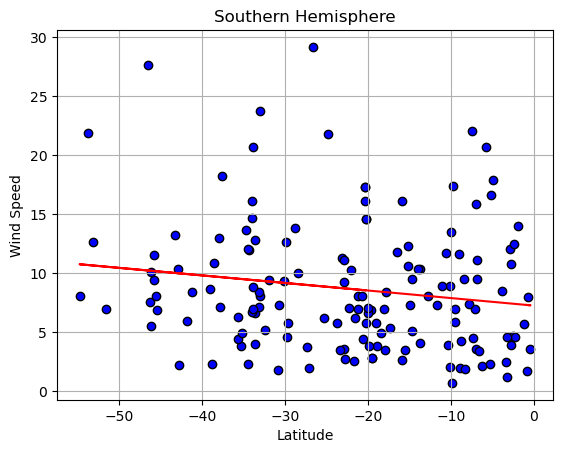

In [22]:
# Southern Hemisphere
regression_line(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere")
plt.grid()
plt.show()

**Discussion about the linear relationship:** Wind speed and latitude have no correlation. Wind speed is likely related to factors other than latitude.